In [1]:
from nn_generalisation.experiment import Experiment, train_model, setup_log_path, get_datetime_str
import matplotlib.pyplot as plt
from nn_generalisation.landscape_analysis.slope import get_jacobian_avg
from nn_generalisation.landscape_analysis.curvature import get_hessian_avg
from nn_generalisation.data.logging_utils import load_model, setup_log, save_json, load_json
from nn_generalisation.neural_net import DenseNN, extend_params, test
import numpy as np
import torch
import os
import re

ModuleNotFoundError: No module named 'nn_generalisation'

In [2]:
experiment_args = {
    "num_hidden_units": [50],
    "train_size": 4000,
    "batch_size": 4000,
    "test_batch_size": 1000,
    "epochs": 3000,
    "lr": 0.001,
    "momentum": 0.95,
    "gamma": 0.9,
    "param_reuse": False,
    "seed": 2,
    "data_seed": 1,
    "pre_transfer": True,
    "log_interval": 20
}

In [3]:
exp = Experiment(experiment_args)

In [31]:
start_model = load_model(55, "./log/2023-07-19_18;12;42/model_size_55_final.pt").to(exp.args["device"])

In [38]:
model_60 = DenseNN(60).to(exp.args["device"])
model_65 = DenseNN(65).to(exp.args["device"])
model_70 = DenseNN(70).to(exp.args["device"])
model_75 = DenseNN(75).to(exp.args["device"])
model_80 = DenseNN(80).to(exp.args["device"])
model_200 = DenseNN(200).to(exp.args["device"])

model_test = DenseNN(100).to(exp.args["device"])
model_60.set_params(extend_params(start_model.get_params(), 60, exp.args["device"]))
model_65.set_params(extend_params(start_model.get_params(), 65, exp.args["device"]))
model_70.set_params(extend_params(start_model.get_params(), 70, exp.args["device"]))
model_75.set_params(extend_params(start_model.get_params(), 75, exp.args["device"]))
model_80.set_params(extend_params(start_model.get_params(), 80, exp.args["device"]))
model_200.set_params(extend_params(start_model.get_params(), 200, exp.args["device"]))

In [26]:
experiment_args["num_hidden_units"] = [60]
exp = Experiment(experiment_args)
exp.models = [model_60]
exp.run()

Experiment Progress: 100%|██████████| 1/1 [09:36<00:00, 576.49s/it]


In [27]:
experiment_args["num_hidden_units"] = [65]
exp = Experiment(experiment_args)
exp.models = [model_65]
exp.run()

Experiment Progress: 100%|██████████| 1/1 [09:29<00:00, 569.57s/it]


In [28]:
experiment_args["num_hidden_units"] = [70]
exp = Experiment(experiment_args)
exp.models = [model_70]
exp.run()

Experiment Progress: 100%|██████████| 1/1 [09:16<00:00, 556.15s/it]


In [29]:
experiment_args["num_hidden_units"] = [75]
exp = Experiment(experiment_args)
exp.models = [model_75]
exp.run()

Experiment Progress: 100%|██████████| 1/1 [09:16<00:00, 556.01s/it]


In [30]:
experiment_args["num_hidden_units"] = [80]
exp = Experiment(experiment_args)
exp.models = [model_80]
exp.run()

Experiment Progress: 100%|██████████| 1/1 [09:31<00:00, 571.12s/it]


In [6]:
experiment_args["num_hidden_units"] = [200]
exp = Experiment(experiment_args)
exp.models = [model_200]
exp.run()

Experiment Progress: 100%|██████████| 1/1 [08:39<00:00, 519.32s/it]


In [6]:
metrics = {
    "model_60": {
        "train": [0.0047467708587646, 0.0057044925689697],
        "test": [0.3306525146484375, 0.3310223449707031]
    },
    "model_65": {
        "train": [0.0044668788909912, 0.0050800690650940],
        "test": [0.3275907257080078, 0.3291063354492187]
    },
    "model_70": {
        "train": [0.0042715635299683, 0.0037789573669434],
        "test": [0.3284523254394531, 0.3261766326904297]
    },
    "model_75": {
        "train": [0.0037726757526398, 0.0041112933158875],
        "test": [0.3228174377441406, 0.3250890716552735]
    },
    "model_80": {
        "train": [0.0039366416931152, 0.0039571733474731],
        "test": [0.3258081085205078, 0.3248722930908203]
    }
}

In [17]:
avg_train = []
avg_test = []
for key, value in metrics.items():
    avg_train.append(sum(value['train']) / 2)
    avg_test.append(sum(value['test']) / 2)

In [19]:
avg_train

[0.00522563171386715,
 0.0047734739780426,
 0.00402526044845585,
 0.00394198453426365,
 0.00394690752029415]

In [20]:
avg_test

[0.3308374298095703,
 0.32834853057861324,
 0.3273144790649414,
 0.32395325469970704,
 0.32534020080566406]

In [23]:
import numpy as np
import torch 
from torchvision import datasets, transforms
from pyhessian import hessian # Hessian computation
from density_plot import get_esd_plot # ESD plot

import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
model_200.eval()
criterion = torch.nn.MSELoss()
train_loader, test_loader = exp.train_loader, exp.test_loader

for inputs, targets in train_loader:
    break


In [69]:
hessian_comp = hessian(model_200, criterion, data=(inputs, targets), cuda=True)

In [70]:
top_eigenvalues, top_eigenvectors = hessian_comp.eigenvalues(top_n=20, maxIter=200)

In [63]:
sum(top_eigenvalues) / 20

4.4633674919605255

In [71]:
sum(top_eigenvalues) / 20

3.8585904359817507

In [18]:
density_eigen, density_weight = hessian_comp.density(iter=1000)

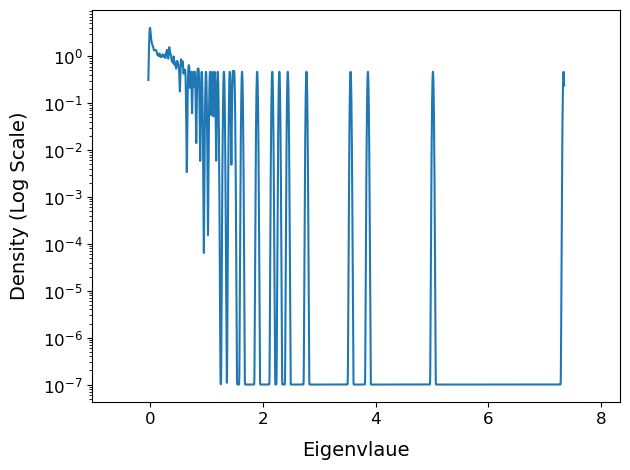

In [12]:
get_esd_plot(density_eigen, density_weight)

In [15]:
print(len(density_eigen[0]))

1000


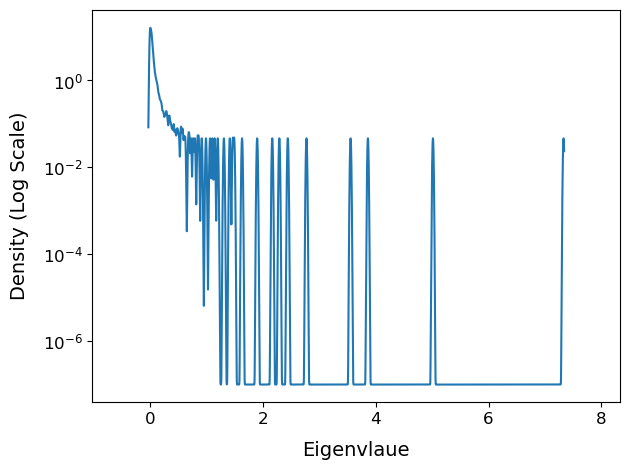

In [14]:
get_esd_plot(density_eigen, density_weight)

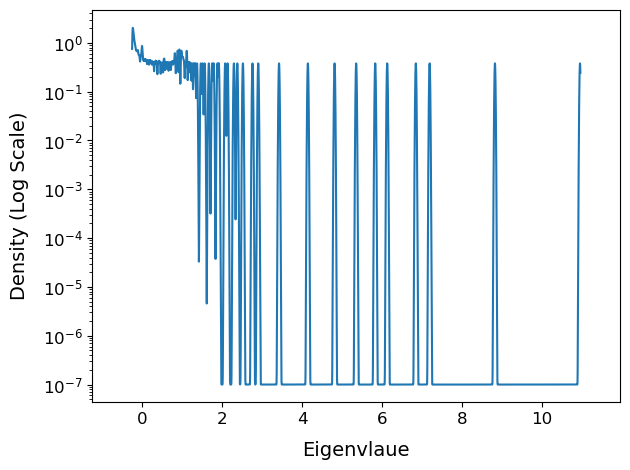

In [14]:
get_esd_plot(density_eigen, density_weight)

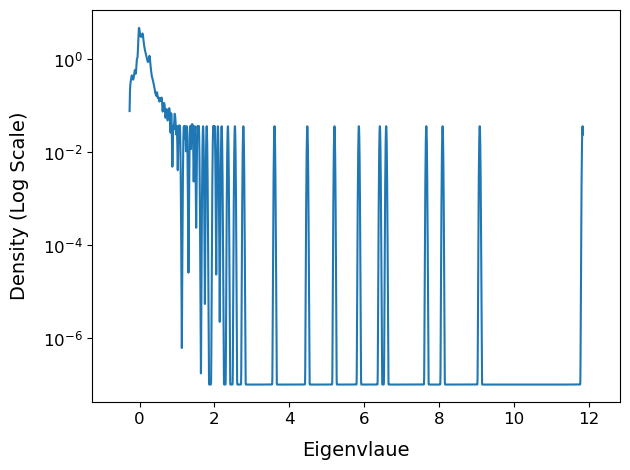

In [19]:
get_esd_plot(density_eigen, density_weight)

In [22]:
len(np.array(density_eigen[0])[np.array(density_eigen[0]) < 0])

292